In [35]:
import json
import pandas as pd
import pickle
try:
    %matplotlib inline
except Exception as e:
    pass

import warnings
warnings.filterwarnings("ignore")
import util
with open('./data-trunc2.json',mode='r') as f:
    # data:dict = json.load(f)
    data:dict = util.partial_json(f, until_key='1577836893387')



In [36]:
with open('./output.json',mode='r') as f:
    ordersdata:dict = json.load(f)
ordersdata

[{'time': 1577836803078, 'actions': ['buyB', 'sellA']},
 {'time': 1577836833217, 'actions': ['buyB']},
 {'time': 1577836863343, 'actions': ['buyB']},
 {'time': 1577836893387, 'actions': ['sellA']},
 {'time': 1577836923677, 'actions': ['buyB', 'sellA']},
 {'time': 1577836989903, 'actions': ['buyB']},
 {'time': 1577837020323, 'actions': ['buyB', 'sellA']},
 {'time': 1577837050481, 'actions': ['buyA']},
 {'time': 1577837080884, 'actions': ['buyA', 'sellB']},
 {'time': 1577837225846, 'actions': ['buyB', 'sellA']},
 {'time': 1577837452300, 'actions': ['buyA', 'sellB']},
 {'time': 1577837602690, 'actions': ['buyA', 'sellB']},
 {'time': 1577837683373, 'actions': ['buyB']},
 {'time': 1577837713577, 'actions': ['buyB']}]

In [85]:
datadf = pd.DataFrame.from_dict(data,orient='index')
import numpy as np

def asks(state):
    ask_ = state['ask']
    return ask_
def bids(state):
    bid_ = state['bid']
    return bid_

assetA:pd.DataFrame = datadf.assetA.apply([asks, bids])
assetB = datadf.assetB.apply([asks, bids])
assetA['action'] = [np.nan for i in range(len(assetA))]
assetA

,asks,bids,action
1577836803078,7189.00,7188.89,NaN
1577836806371,7190.09,7190.05,NaN
1577836806459,7190.09,7190.05,NaN
1577836806474,7190.43,7190.05,NaN
1577836806575,7190.39,7190.05,NaN
...,...,...,...
1577836892757,7181.04,7180.32,NaN
1577836892990,7181.04,7180.32,NaN
1577836893181,7181.03,7180.11,NaN
1577836893284,7180.93,7180.12,NaN


In [93]:
orderdf = pd.DataFrame(ordersdata)
orderdf.index = orderdf.time
orderdf

,time,actions
time,,
1577836803078,1577836803078,"[buyB, sellA]"
1577836833217,1577836833217,[buyB]
1577836863343,1577836863343,[buyB]
1577836893387,1577836893387,[sellA]
1577836923677,1577836923677,"[buyB, sellA]"
1577836989903,1577836989903,[buyB]
1577837020323,1577837020323,"[buyB, sellA]"
1577837050481,1577837050481,[buyA]
1577837080884,1577837080884,"[buyA, sellB]"


In [81]:
for i in range(len(assetA)):
    ts = assetA.index[i]
    

0     [buyB, sellA]
1            [buyB]
2            [buyB]
3           [sellA]
4     [buyB, sellA]
5            [buyB]
6     [buyB, sellA]
7            [buyA]
8     [buyA, sellB]
9     [buyB, sellA]
10    [buyA, sellB]
11    [buyA, sellB]
12           [buyB]
13           [buyB]
Name: actions, dtype: object

In [78]:
import numpy as np
assetA['actions'] = orderdf['actions']
assetA['actions']

1577836803078    NaN
1577836806371    NaN
1577836806459    NaN
1577836806474    NaN
1577836806575    NaN
                ... 
1577836892757    NaN
1577836892990    NaN
1577836893181    NaN
1577836893284    NaN
1577836893354    NaN
Name: actions, Length: 603, dtype: object

In [ ]:
for i in range(len(assetA)):
    if not assetA['actions'][i] is np.nan:
        assetA['actions'][i] = 7180
assetA['actions'].isnull().values

In [ ]:
util.plot(assetA[['asks','bids']], title='Asset A')

In [ ]:
assetA['actions']

In [ ]:
util.plotmany(assetA.index, [
    (assetA[['asks','bids']], dict(label='Asks & Bids')),
    (assetA['actions'], dict(label='actions', marker='^', color='white')),
])

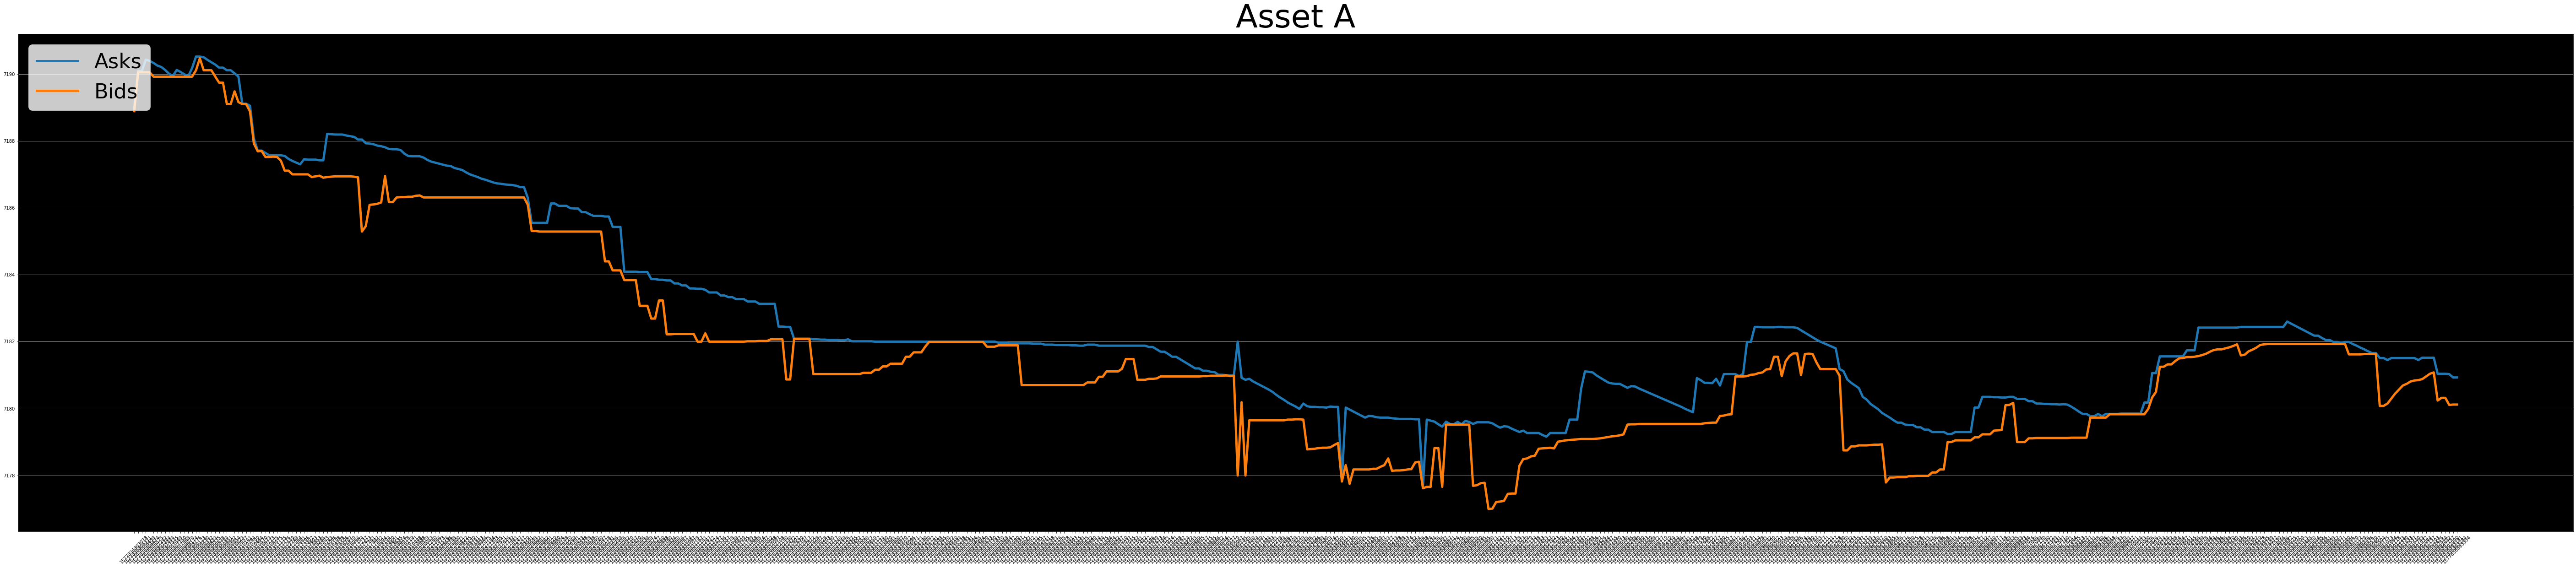

In [45]:
util.plot(assetA[['asks','bids']], title='Asset A')

In [59]:
assetA['actions']

1577836803078    NaN
1577836806371    NaN
1577836806459    NaN
1577836806474    NaN
1577836806575    NaN
                ... 
1577836892757    NaN
1577836892990    NaN
1577836893181    NaN
1577836893284    NaN
1577836893354    NaN
Name: actions, Length: 603, dtype: object

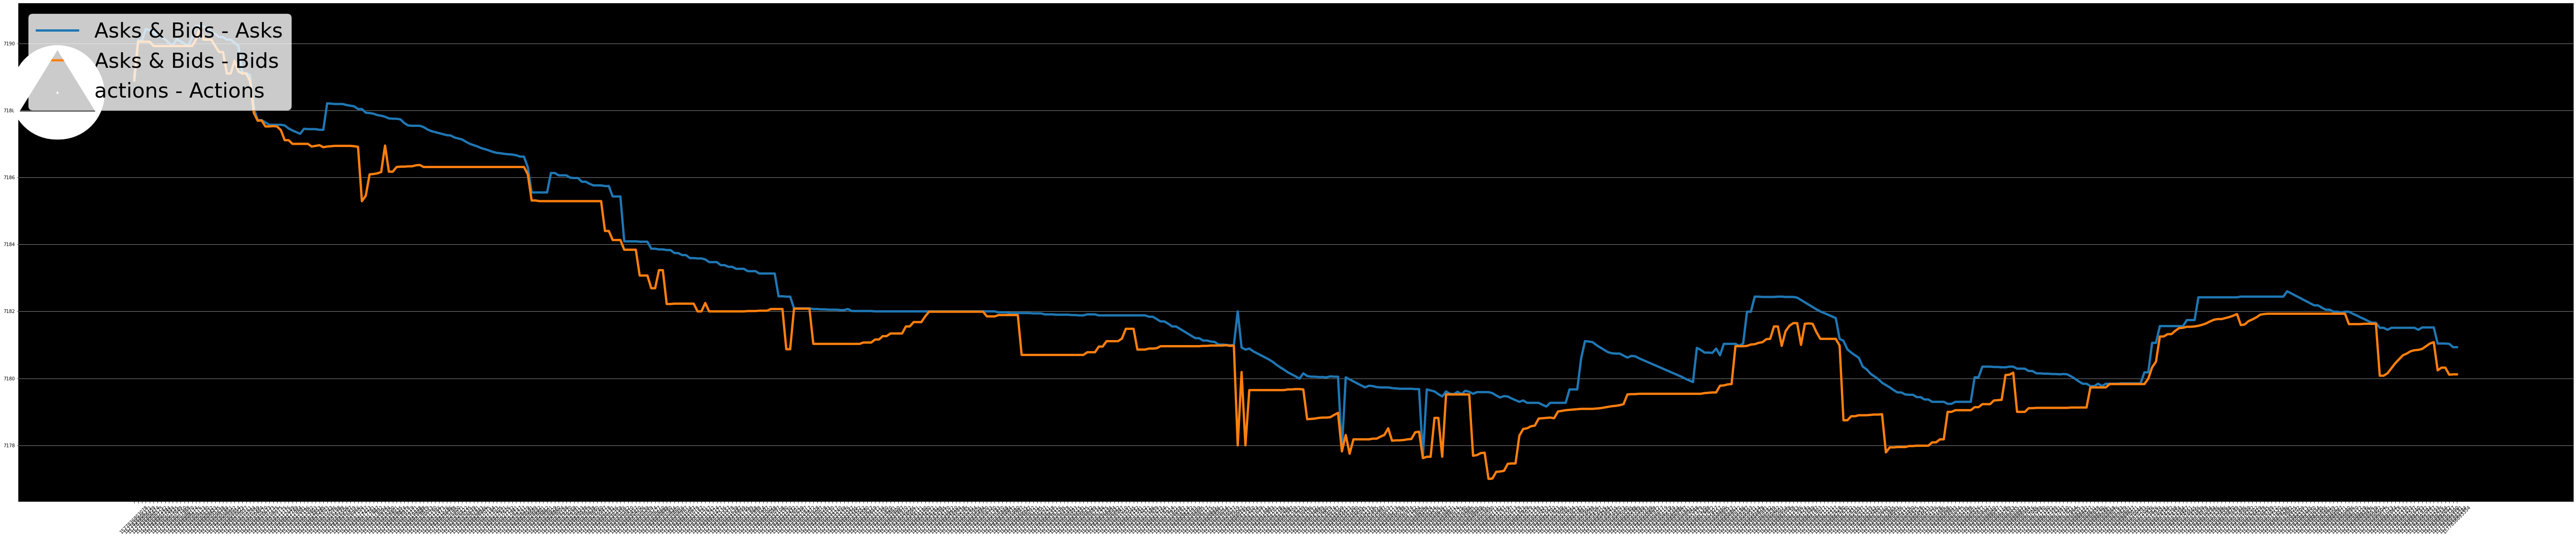

In [58]:
util.plotmany(assetA.index, [
    (assetA[['asks','bids']], dict(label='Asks & Bids')),
    (assetA['actions'], dict(label='actions', marker='^', color='white')),
])

In [6]:
util.plot(assetB, title='Asset B')

,asks,bids
1577836803078,7189.00,7188.89
1577836806371,7190.09,7190.05
1577836806459,7190.09,7190.05
1577836806474,7190.43,7190.05
1577836806575,7190.39,7190.05
...,...,...
1577836892757,7181.04,7180.32
1577836892990,7181.04,7180.32
1577836893181,7181.03,7180.11
1577836893284,7180.93,7180.12
